# Red Profunda Perceptrón Multicapa
## Imports Necesarios

In [4]:
# Imports necesarios
import numpy as np
import pandas as pd
#import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
#from sklearn import linear_model
#from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import LSTM
#from keras.layers import Flatten
#from keras.optimizers import Adam
#from pyimagesearch import models

## Cargar archivo de Entradas

In [5]:
#cargamos los datos de entrada
data = pd.read_csv("/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/wf1_train_fin.csv", index_col=0)
#veamos cuantas dimensiones y registros contiene
#data.shape
# Ver los 1ros registros
data.head()

,hors,ws,wd,anno,mes,wp1
0,1,2.47,108.68,2009,7,0.085
1,2,2.40,114.31,2009,7,0.020
2,3,2.51,118.71,2009,7,0.060
3,4,2.73,120.86,2009,7,0.045
4,5,2.93,120.13,2009,7,0.035


## Separar Datos de Entrenamiento (Train) y Test

In [49]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
#data_train = data.sample(frac=1,random_state=200) 
#data_test = data.drop(data_train.index) 

# 75% train y 25% test
data_train, data_test = train_test_split(data, random_state=200)

dataset_train = data_train.values
x_train = dataset_train[:,1:3]
y_train = dataset_train[:,5]

dataset_test = data_test.values
x_test = dataset_test[:,1:3]
y_test = dataset_test[:,5]

#dataX2 =  pd.DataFrame()
#dataX2["ws"] =data_train["ws"]
#dataX2["wd"] =data_train["wd"]
#dataX2["anno"] =data_train["anno"]
#dataX2["mes"] =data_train["mes"]

#x_train= np.array(dataX2,"float32")
#y_train = np.array(data_train['wp1'].values,"float32")

#y_train  

#print(y_train[0:1].shape) 

#x_train.shape

#x_test
x_train

array([[  6.39,  91.96],
       [  4.01, 273.76],
       [  5.83, 144.93],
       ...,
       [  7.41,  55.18],
       [  4.02, 324.39],
       [  2.55, 337.06]])

In [50]:
#x_train

In [51]:
#y_train

## Adaptar Datos para LSTM

In [52]:
#reshape
x_train_re = x_train.reshape((x_train.shape[0],1,x_train.shape[1]))
x_train = x_train_re


x_test_re = x_test.reshape((x_test.shape[0],1,x_test.shape[1]))
x_test = x_test_re



#print(x_train.shape, y_train.shape)

In [12]:
x_train

array([[[  6.39,  91.96]],

       [[  4.01, 273.76]],

       [[  5.83, 144.93]],

       ...,

       [[  7.41,  55.18]],

       [[  4.02, 324.39]],

       [[  2.55, 337.06]]])

In [13]:
y_train

array([0.065, 0.   , 0.19 , ..., 0.546, 0.075, 0.055])

## Crear Modelo, Entrenarlo y Predecir

In [ ]:

csv_logger = keras.callbacks.CSVLogger('training.log', separator=',', append=False)

## cargamos las 4 combinaciones de las compuertas XOR
#training_data = x_train
 
# y estos son los resultados que se obtienen, en el mismo orden
#target_data = y_train


# import norm
#from keras.constraints import max_norm
# instantiate norm
#norm = max_norm(3.0)
keras.callbacks.Callback()

#, kernel_constraint=max_norm(3), bias_constraint=max_norm(3))
model = Sequential()
model.add(LSTM(100, return_sequences = True,input_shape=(1, 2)))
model.add(LSTM(100, return_sequences = True))
model.add(LSTM(100, return_sequences = True))
model.add(LSTM(100, return_sequences = True))
model.add(LSTM(100, return_sequences = True))
model.add(LSTM(100, return_sequences = True))
model.add(LSTM(100, return_sequences = True))
model.add(LSTM(100, return_sequences = False))
model.add(Dense(1, activation="linear"))


model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy','mean_squared_error'])

#metrics=['accuracy']
 
hist=model.fit(x_train, y_train, epochs=10, batch_size=300, verbose=2, shuffle=False, callbacks=[csv_logger])
#validation_data=(x_test, y_test),
 
# evaluamos el modelo
#scores = model.evaluate(x_train, y_train)
 
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#print (model.predict(x_train).round())

Epoch 1/10


In [62]:
y_pred_train = model.predict(x_train)    
y_pred_test = model.predict(x_test) 

In [63]:
#len(y_pred_train)

## Obtener Metricas del Modelo

In [64]:
# evaluamos el modelo
scores = model.evaluate(x_test, y_test)

26208/26208 [==============================] - 14s 541us/step


In [65]:
#print("R2:",  r2_keras(y_train, y_pred_train) )
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#print("\n%s: %.2f%%" % (model.metrics_names[2], scores[2]*100))
#print (model.predict(x_train).round())


loss: 2.88%

binary_accuracy: 8.03%


In [66]:
from sklearn.metrics import r2_score
print('Coefficient of determination Train (R^2): %.2f' % r2_score(y_train, y_pred_train))

Coefficient of determination Train (R^2): 0.32


## Graficar Resultados

In [67]:
neuronas =100
#pred_train = model.predict(x_train)
corr = np.corrcoef(y_train, y_pred_train[:, 0])

In [68]:
pred_train_plot = pred_train[2000:2050]
y_train_plot = y_train[2000:2050]

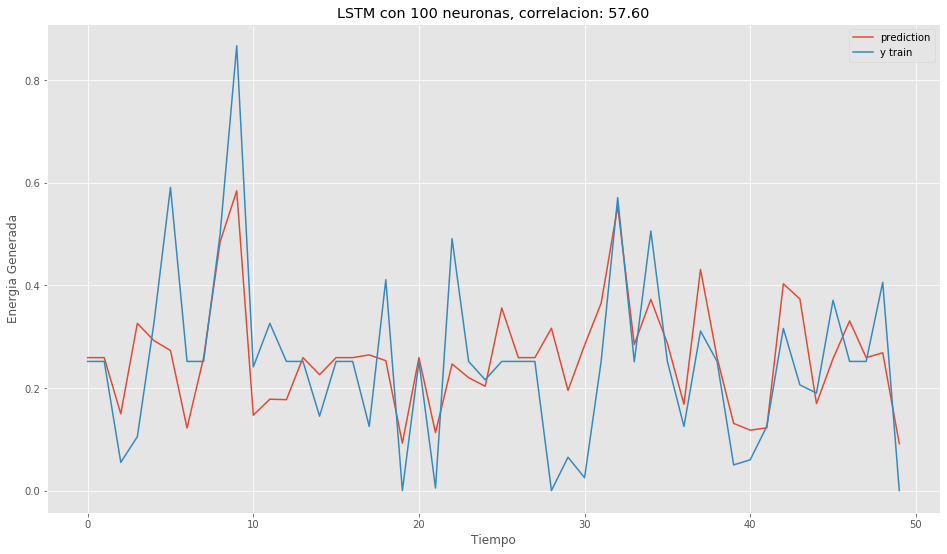

In [69]:
plt.plot(pred_train_plot, label ="prediction")
plt.plot(y_train_plot, label ="y train")
#plt.plot(trainPredictPlot, label ="train pred" )
plt.title("LSTM con %i neuronas, correlacion: %.2f" % (neuronas, corr[1][0] * 100))
plt.ylabel("Energia Generada")
plt.xlabel("Tiempo")
plt.legend()
plt.show()

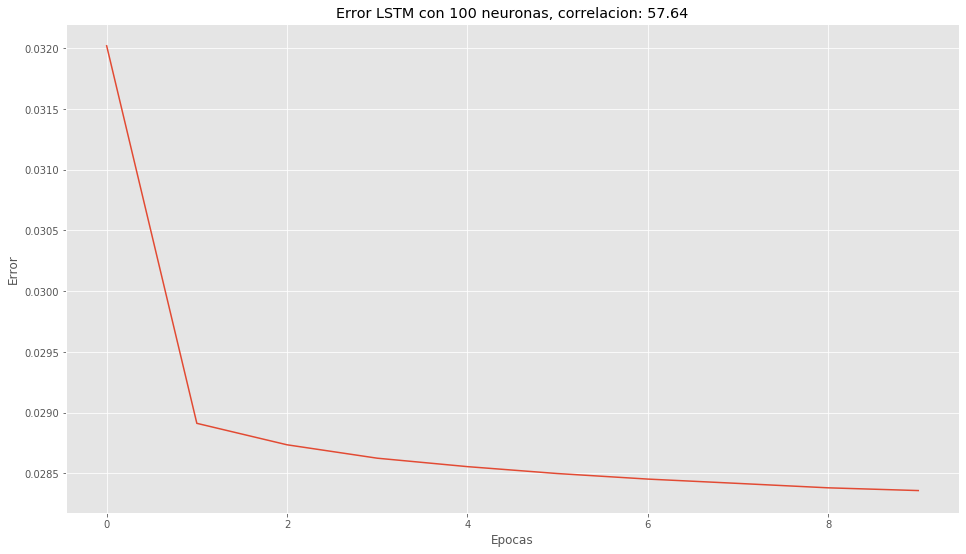

In [36]:
registro = pd.read_csv('training.log', sep=",")
plt.plot(registro["epoch"].values, registro["loss"].values)
plt.title("Error LSTM con %i neuronas, correlacion: %.2f" % (neuronas, corr[1][0] * 100))
plt.ylabel("Error")
plt.xlabel("Epocas")
plt.show()

In [149]:
print(hist.history.keys())

dict_keys(['loss', 'binary_accuracy', 'mean_squared_error'])


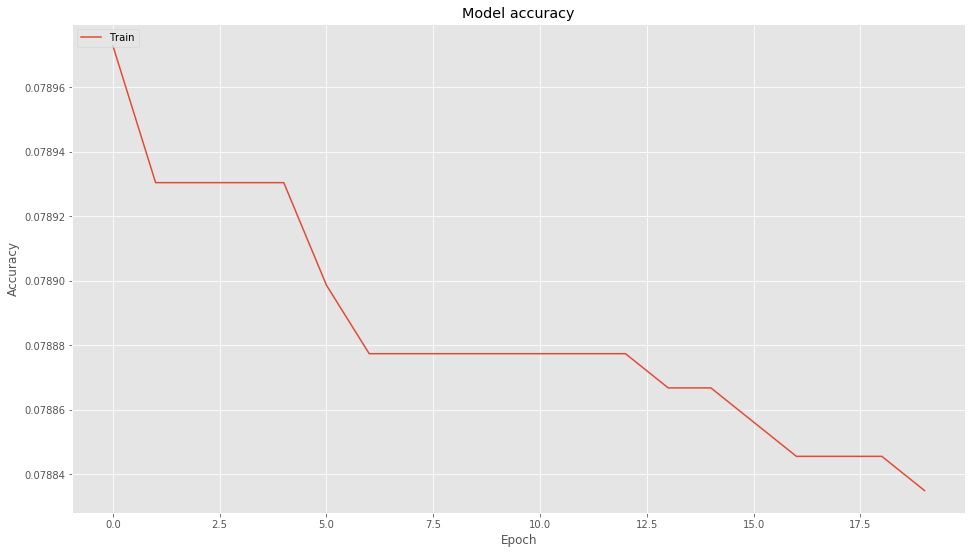

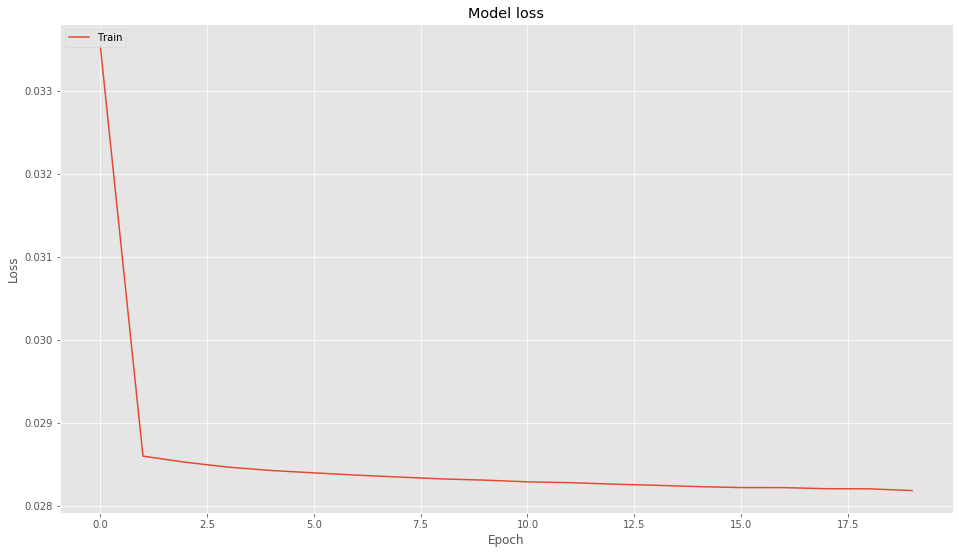

In [150]:
# Plot training & validation accuracy values
plt.plot(hist.history['binary_accuracy'])
#plt.plot(hist.history['val_binary_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [34]:
## Vamos a comprobar:
# Quiero predecir cuántos "wp1" voy a obtener por 13 ws (wind speed mph),
# según nuestro modelo, hacemos:

#y_12 = regr.predict([[12,70.4,2012,7]])
test= np.array([[3.66,106.24,2009,7]])
y_12 = model.predict(test)


print(y_12)

[[0.2717455]]


In [35]:

df_test = pd.read_csv("/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/test_24.csv")
#veamos cuantas dimensiones y registros contiene

# Ver los 1ros registros
df_test.head()

,ws,wd,anno,mes
0,6.00,129.58,2009,7
1,5.95,129.18,2009,7
2,5.58,128.26,2009,7
3,5.02,126.75,2009,7
4,4.36,124.69,2009,7


In [36]:
df_test.describe()

,ws,wd,anno,mes
count,48.000000,48.000000,48.0,48.0
mean,5.201875,117.106667,2009.0,7.0
std,1.878959,9.265603,0.0,0.0
min,2.540000,100.850000,2009.0,7.0
25%,3.395000,110.390000,2009.0,7.0
50%,4.970000,117.195000,2009.0,7.0
75%,6.800000,123.850000,2009.0,7.0
max,8.700000,139.140000,2009.0,7.0


In [37]:
#x_test = df_test[:,1:5]
#y_train = dataset[:,5

In [38]:
df = df_test.values
x_test = df[:,0:4]

x_test

y_12 = model.predict(x_test)

print(y_12)

[[0.2876894 ]
 [0.28733653]
 [0.28382248]
 [0.278556  ]
 [0.27247322]
 [0.2669514 ]
 [0.26263934]
 [0.26079124]
 [0.26227742]
 [0.2674305 ]
 [0.27445564]
 [0.2807752 ]
 [0.28510275]
 [0.28837508]
 [0.2927746 ]
 [0.2991931 ]
 [0.306817  ]
 [0.31375518]
 [0.31832057]
 [0.31797013]
 [0.30955103]
 [0.29144642]
 [0.26939908]
 [0.25152948]
 [0.24679148]
 [0.25241008]
 [0.2605782 ]
 [0.265843  ]
 [0.26808086]
 [0.2676657 ]
 [0.26527187]
 [0.26369336]
 [0.26557082]
 [0.27277327]
 [0.28222504]
 [0.29117727]
 [0.29802597]
 [0.30386725]
 [0.308655  ]
 [0.31150702]
 [0.3131152 ]
 [0.3152927 ]
 [0.31865206]
 [0.31969678]
 [0.3134599 ]
 [0.29705384]
 [0.27641323]
 [0.2606102 ]]


### 